In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Salary_data = pd.read_csv('F:\\PYTHON\\DATA SCIENCE\\KNN AND SVM\\Assignment\\SVM\\SalaryData_Train(1).csv')
Salary_data_test  = pd.read_csv('F:\\PYTHON\\DATA SCIENCE\\KNN AND SVM\\Assignment\\SVM\\SalaryData_Test(1).csv')

In [3]:
Salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
Salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
Salary_data['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
Salary_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
duplicate = Salary_data[Salary_data.duplicated()]
# Duplicate rows

In [8]:
Salary_data = Salary_data.drop(duplicate.index , axis=0 ).reset_index(drop=True)
# Removing duplicates

In [9]:
Salary_data.shape

(26903, 14)

In [10]:
Salary_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
Salary_data_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
duplicate_test = Salary_data_test[Salary_data_test.duplicated()]
# Duplicate rows

In [13]:
Salary_data_test = Salary_data_test.drop(duplicate_test.index , axis=0 ).reset_index(drop=True)
# Removing duplicates

In [14]:
Salary_data_test.shape

(14130, 14)

In [15]:
Salary = pd.concat([Salary_data,Salary_data_test] ,axis=0)

In [16]:
Salary.reset_index(drop=True , inplace=True)

In [17]:
Salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
41029,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
41030,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
41031,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [18]:
Salary.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_10820/1830778543.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Salary.skew()


age              0.517353
educationno     -0.347679
capitalgain     11.269403
capitalloss      4.285602
hoursperweek     0.350477
dtype: float64

In [19]:
Salary.kurt()

C:\Users\admin\AppData\Local\Temp/ipykernel_10820/1708301259.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Salary.kurt()


age              -0.172397
educationno       0.558388
capitalgain     137.074671
capitalloss      17.260575
hoursperweek      2.988620
dtype: float64

In [20]:
corr = Salary.corr()
corr

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.032454,0.077062,0.052827,0.077909
educationno,0.032454,1.000000,0.128250,0.081947,0.139457
capitalgain,0.077062,0.128250,1.000000,-0.035293,0.082900
capitalloss,0.052827,0.081947,-0.035293,1.000000,0.051567
hoursperweek,0.077909,0.139457,0.082900,0.051567,1.000000


<AxesSubplot:>

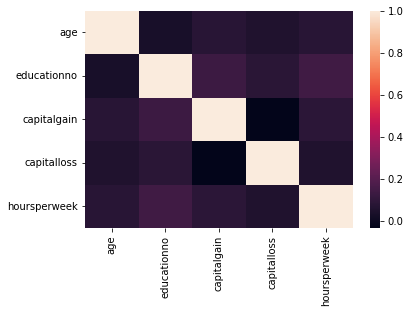

In [21]:
sns.heatmap(corr)

In [22]:
print('workclass',Salary.workclass.value_counts())
print('education',Salary.education.value_counts())
print('maritalstatus',Salary['maritalstatus'].value_counts())
print('occupation',Salary.occupation.value_counts())
print('relationship',Salary.relationship.value_counts())
print('race',Salary.race.value_counts())
print('sex',Salary.sex.value_counts())
print('native',Salary['native'].value_counts())
print('Salary',Salary.Salary.value_counts())
# Unique values 

workclass  Private             29351
 Self-emp-not-inc     3710
 Local-gov            3031
 State-gov            1917
 Self-emp-inc         1614
 Federal-gov          1389
 Without-pay            21
Name: workclass, dtype: int64
education  HS-grad         12741
 Some-college     8907
 Bachelors        6872
 Masters          2422
 Assoc-voc        1890
 Assoc-acdm       1487
 11th             1483
 10th             1165
 7th-8th           806
 Prof-school       773
 9th               668
 12th              552
 Doctorate         532
 5th-6th           444
 1st-4th           220
 Preschool          71
Name: education, dtype: int64
maritalstatus  Married-civ-spouse       18861
 Never-married            12888
 Divorced                  6035
 Separated                 1398
 Widowed                   1267
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
occupation  Prof-specialty       5682
 Exec-managerial      5543
 Adm-clerical         4994

<AxesSubplot:xlabel='count', ylabel='Salary'>

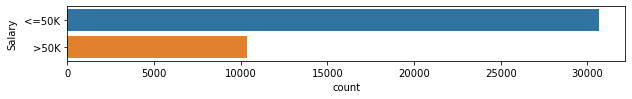

In [23]:
plt.figure(figsize=(10,1))
sns.countplot(y='Salary' ,data=Salary)

In [24]:
Salary['education'] = Salary['education'].apply(lambda x: x.strip())
# Removing white space

In [25]:
Salary['education'].replace(['Preschool','10th','11th','12th','1st-4th','5th-6th','7th-8th','9th'],'dropout',inplace=True)
Salary['education'].replace(['HS-Grad','HS-grad'], 'HighGrad',inplace=True)
Salary['education'].replace(['Some-college','Assoc-acdm','Assoc-voc'], 'College',inplace=True)
Salary['education'].replace('Bachelors', 'Bachelors',inplace=True)
Salary['education'].replace(['Masters','Prof-school'], 'Masters',inplace=True)
Salary['education'].replace('Doctorate', 'Doctorate',inplace=True)
# Reducing num of unique values 

<AxesSubplot:xlabel='count', ylabel='education'>

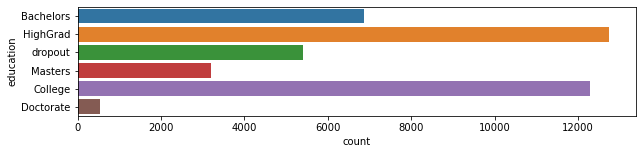

In [26]:
plt.figure(figsize=(10,2))
sns.countplot(y='education' ,data=Salary)

In [27]:
Salary[['education', 'educationno']].groupby(['education'], as_index=False).mean().sort_values(by='educationno', ascending=False)

,education,educationno
2,Doctorate,16.000000
4,Masters,14.241941
0,Bachelors,13.000000
1,College,10.395962
3,HighGrad,9.000000
5,dropout,5.582178


In [28]:
Salary['maritalstatus'] = Salary['maritalstatus'].apply(lambda x: x.strip())
# Removing white space

In [29]:
Salary['maritalstatus'].replace(['Never-married','Married-spouse-absent'], 'NotMarried',inplace=True)
Salary['maritalstatus'].replace(['Married-AF-spouse','Married-civ-spouse'], 'Married',inplace=True)
Salary['maritalstatus'].replace(['Separated','Divorced'], 'Separated',inplace=True)
Salary['maritalstatus'].replace(['Widowed'], 'Widowed',inplace=True)

In [30]:
Salary['maritalstatus'].value_counts()

Married       18893
NotMarried    13440
Separated      7433
Widowed        1267
Name: maritalstatus, dtype: int64

<AxesSubplot:xlabel='count', ylabel='maritalstatus'>

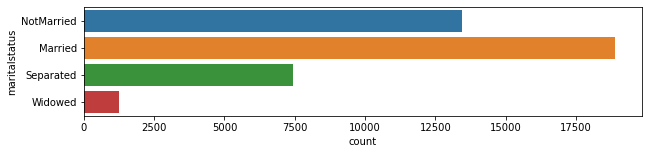

In [31]:
plt.figure(figsize=(10,2))
sns.countplot(y='maritalstatus' ,data=Salary)

<AxesSubplot:xlabel='count', ylabel='occupation'>

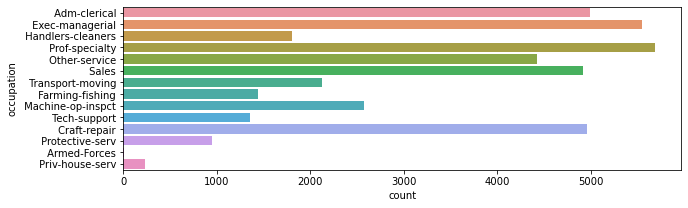

In [32]:
plt.figure(figsize=(10,3))
sns.countplot(y='occupation' ,data=Salary)

In [33]:
Salary.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [34]:
Salary['workclass'] = Salary['workclass'].apply(lambda x: x.strip())
Salary['occupation'] = Salary['occupation'].apply(lambda x: x.strip())
Salary['relationship'] = Salary['relationship'].apply(lambda x: x.strip())
Salary['race'] = Salary['race'].apply(lambda x: x.strip())
Salary['sex'] = Salary['sex'].apply(lambda x: x.strip())
Salary['native'] = Salary['native'].apply(lambda x: x.strip())
Salary['Salary'] = Salary['Salary'].apply(lambda x: x.strip())

C:\Users\admin\anaconda3.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


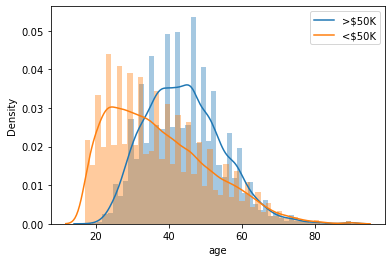

In [35]:
sns.distplot(Salary[Salary['Salary'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(Salary[Salary['Salary'] == '<=50K']['age'], kde_kws={"label": "<$50K"})
plt.legend()

In [36]:
Salary[['Salary', 'age']].groupby(['Salary'], as_index=False).mean().sort_values(by='age', ascending=False)
# Mean age 

,Salary,age
1,>50K,44.124928
0,<=50K,37.377117


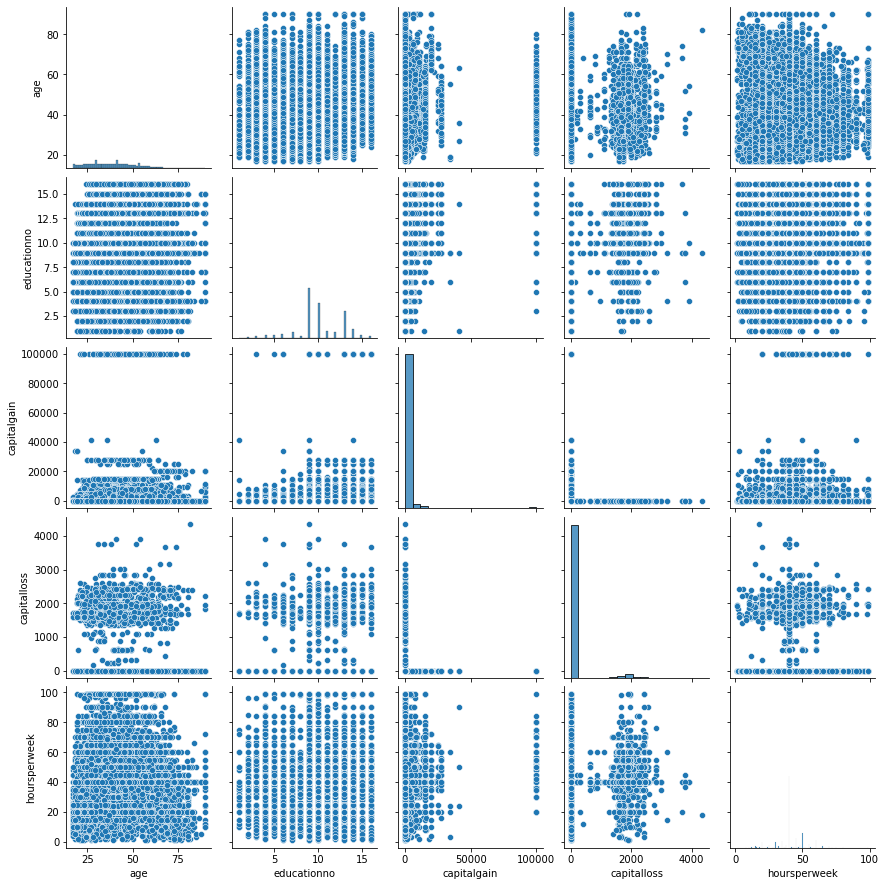

In [37]:
sns.pairplot(Salary)

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
Salary = Salary.apply(LabelEncoder().fit_transform)
Salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,0,12,1,0,1,4,1,26,0,39,37,0
1,33,4,0,12,0,3,0,4,1,0,0,12,37,0
2,21,2,3,8,2,5,1,4,1,0,0,39,37,0
3,36,2,5,6,0,5,0,2,1,0,0,39,37,0
4,11,2,0,12,0,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,16,2,0,12,1,9,3,4,1,0,0,39,37,0
41029,22,2,0,12,2,9,1,4,0,0,0,35,37,0
41030,21,2,0,12,0,9,0,4,1,0,0,49,37,0
41031,27,2,0,12,2,0,3,1,1,81,0,39,37,0


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [67]:
Salary_data  = scaler.fit_transform(Salary.iloc[:,0:-1])
Salary_data

array([[-0.00645991,  2.79296598, -1.34907962, ..., -0.21716864,
        -0.09048135,  0.27801604],
       [ 0.82235376,  1.78801353, -1.34907962, ..., -0.21716864,
        -2.30082437,  0.27801604],
       [-0.08180661, -0.22189139,  0.46796218, ..., -0.21716864,
        -0.09048135,  0.27801604],
       ...,
       [-0.08180661, -0.22189139, -1.34907962, ..., -0.21716864,
         0.72816421,  0.27801604],
       [ 0.37027357, -0.22189139, -1.34907962, ..., -0.21716864,
        -0.09048135,  0.27801604],
       [-0.3078467 ,  0.78306107, -1.34907962, ..., -0.21716864,
         1.54680977,  0.27801604]])

In [69]:
Salary_data = pd.DataFrame(Salary_data,columns=Salary.iloc[:,0:-1].columns)
Salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-0.006460,2.792966,-1.349080,1.095540,0.256762,-1.504081,-0.272500,0.402587,0.704756,0.747286,-0.217169,-0.090481,0.278016
1,0.822354,1.788014,-1.349080,1.095540,-0.923578,-0.758728,-0.893003,0.402587,0.704756,-0.295541,-0.217169,-2.300824,0.278016
2,-0.081807,-0.221891,0.467962,-0.434642,1.437101,-0.261826,-0.272500,0.402587,0.704756,-0.295541,-0.217169,-0.090481,0.278016
3,1.048394,-0.221891,1.679323,-1.199733,-0.923578,-0.261826,-0.893003,-1.913156,0.704756,-0.295541,-0.217169,-0.090481,0.278016
4,-0.835274,-0.221891,-1.349080,1.095540,-0.923578,0.731978,2.209515,-1.913156,-1.418931,-0.295541,-0.217169,-0.090481,-5.045359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,-0.458540,-0.221891,-1.349080,1.095540,0.256762,0.731978,0.968508,0.402587,0.704756,-0.295541,-0.217169,-0.090481,0.278016
41029,-0.006460,-0.221891,-1.349080,1.095540,1.437101,0.731978,-0.272500,0.402587,-1.418931,-0.295541,-0.217169,-0.417940,0.278016
41030,-0.081807,-0.221891,-1.349080,1.095540,-0.923578,0.731978,-0.893003,0.402587,0.704756,-0.295541,-0.217169,0.728164,0.278016
41031,0.370274,-0.221891,-1.349080,1.095540,1.437101,-1.504081,0.968508,-3.071027,0.704756,2.953266,-0.217169,-0.090481,0.278016


In [77]:
Salary_train = Salary_data.iloc[0:30161 ,:]
Salary_test = Salary_data.iloc[30161: ,:]

In [78]:
X_test = Salary_test.iloc[: ,0:-1]
Y_test = Salary.iloc[30161: ,-1]

In [79]:
X_train = Salary_train.iloc[:,0:-1]
Y_train = Salary.iloc[0:30161 ,-1] 

# Model

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold,cross_val_score

In [43]:
kfold = KFold(n_splits= 4)

In [81]:
clf = SVC(kernel='rbf' ,gamma= 50 ,C= 0.1)
#param_grid = [{'kernel':['rbf'],'gamma':[5,10,0.5],'C':[10,0.1,0.001,1] }]
result = clf.fit(X_train,Y_train)
predict = clf.predict(X_test)

In [82]:
np.mean(Y_test==predict)
# Model with accuracy of 75%

0.7513796909492274

In [83]:
print(confusion_matrix(predict,Y_test))
print(classification_report(predict,Y_test))

[[8169 2703]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     10872
           1       0.00      0.00      0.00         0

    accuracy                           0.75     10872
   macro avg       0.50      0.38      0.43     10872
weighted avg       1.00      0.75      0.86     10872



C:\Users\admin\anaconda3.2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3.2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3.2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
